In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Step 1. Data Preprocessing

In [2]:
# Load the data
X = pd.read_csv("Training Data/Linear_X_Train.csv")
Y = pd.read_csv("Training Data/Linear_Y_Train.csv")

X = X.values
Y = Y.values

print(X.shape, Y.shape)

(3750, 1) (3750, 1)


In [3]:
# Normalistion
u = X.mean()
std = X.std()
X = (X-u)/std

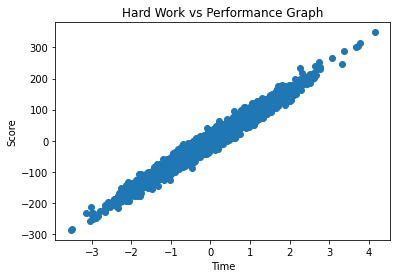

In [4]:
# Visualisation
plt.scatter(X, Y)
plt.title("Hard Work vs Performance Graph")
plt.xlabel("Time")
plt.ylabel("Score")
plt.show()

### Step 2. Linear Regression

In [5]:
def hypothesis(x, theta):
    y_ = theta[0] + theta[1]*x
    return y_

In [6]:
def gradient(X, Y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    
    for i in range(m):
        x = X[i]
        y = Y[i]
        y_ = hypothesis(x, theta)
        grad[0] += y_ - y
        grad[1] += (y_ - y)*x
        
    return grad/m

In [7]:
def error(X_train, Y_train, theta):
    m = X_train.shape[0]
    total_error = 0.0
    
    for i in range(m):
        x = X_train[i]
        y = Y_train[i]
        y_ = hypothesis(x, theta)
        total_error += (y_ - y)**2
        
    return total_error/m

In [8]:
def gradient_descent(X, Y, max_steps = 100, learning_rate = 0.1):
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    for i in range(max_steps):
        grad = gradient(X, Y, theta)
        e = error(X, Y, theta)
        error_list.append(e)
        theta_list.append((theta[0],theta[1]))
        
        theta[0] -= learning_rate * grad[0]
        theta[1] -= learning_rate * grad[1]
        
    return theta, error_list, theta_list

In [9]:
theta, error_list, theta_list = gradient_descent(X, Y)

In [10]:
print(theta)

[ 0.6838508  79.90361453]


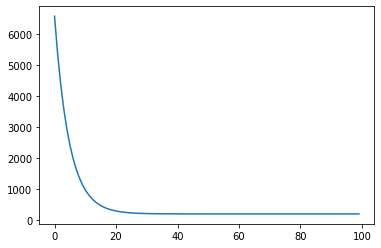

In [11]:
plt.plot(error_list)
plt.show()

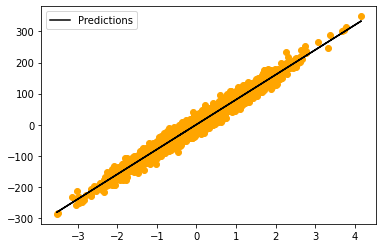

In [12]:
Y_ = hypothesis(X, theta)
plt.scatter(X, Y, color = "orange")
plt.plot(X, Y_, color = "black", label = "Predictions")
plt.legend()
plt.show()


### Step 3. Making Predictions on Test data

In [13]:
X_test = pd.read_csv("Test Cases/Linear_X_Test.csv")
X_test = X_test.values
print(X_test.shape)

(1250, 1)


In [14]:
Y_test = hypothesis(X_test, theta)
print(Y_test)

[[-149.37069577]
 [ -68.75494042]
 [-201.48687035]
 ...
 [  10.9121384 ]
 [ -21.53235759]
 [ -53.68460035]]


In [15]:
df = pd.DataFrame(Y_test, columns = ["y"])

In [16]:
df.head()

,y
0,-149.370696
1,-68.754940
2,-201.486870
3,221.234243
4,47.906897


In [17]:
df.to_csv("Pedictions - Hardwork Pays Off", index = False)

### Step 4. Computing Score
Score : Coefficient of Detemination or R2(R-Squared)

In [18]:
def r2_score(Y, Y_):
    num = np.sum((Y - Y_)**2)
    denom = np.sum((Y - Y.mean())**2)
    
    score = 1 - (num/denom)
    return score*100

In [19]:
r2_score(Y, Y_)

97.09612226971643

### Step 5. Visualising Loss Function, Gradient Descent, theta Updates

In [20]:
print(theta)

[ 0.6838508  79.90361453]


In [21]:
T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)

T0, T1 = np.meshgrid(T0, T1)
J = np.zeros(T0.shape)

for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        Y_ = T0[i,j] + T1[i,j]*X
        J[i,j] = np.sum((Y_ - Y)**2)/(Y.shape[0])

In [22]:
J.shape

(80, 80)

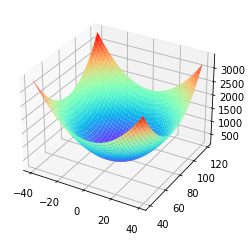

In [23]:
fig = plt.figure()
axes = fig.gca(projection = '3d')
axes.plot_surface(T0, T1, J, cmap = 'rainbow')
plt.show()

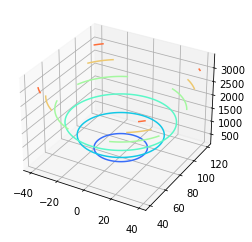

In [24]:
fig = plt.figure()
axes = fig.gca(projection = '3d')
axes.contour(T0, T1, J, cmap = 'rainbow')
plt.show()

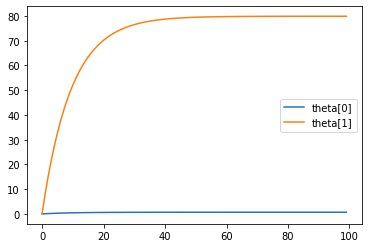

In [26]:
theta_list = np.array(theta_list)
plt.plot(theta_list[:,0], label = "theta[0]")
plt.plot(theta_list[:,1], label = "theta[1]")
plt.legend()
plt.show()

### Trajectory traced by Theta Updates in Loss Function

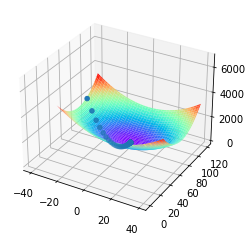

In [27]:
fig = plt.figure()
axes = fig.gca(projection = '3d')
axes.plot_surface(T0, T1, J, cmap = 'rainbow')
axes.scatter(theta_list[:,0], theta_list[:,1], error_list)
plt.show()